<a href="https://colab.research.google.com/github/estefanialopeez/Actividad_3/blob/main/Actividad_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#cargar archivo csv desde el equipo
from google.colab import files
files.upload()

#DataFrame para 2020

In [46]:
df_2020=pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name='2020', skiprows=5)
df_2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00


In [33]:
#supervisar que no hay nulos
nulos=df_2020.isnull().sum()
print(nulos)
#conocer el tipo de informacion que se contiene en el data Frame
print(df_2020.info())

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC   

<Figure size 2500x1500 with 0 Axes>

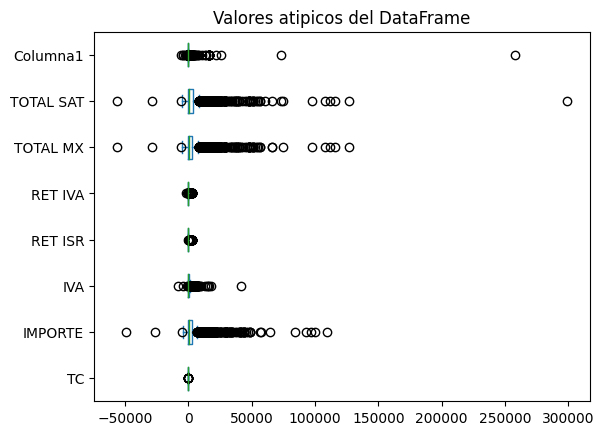

In [70]:
fig= plt.figure(figsize=(25,15))
df_2020.plot(kind='box', vert=False)
plt.title('Valores atipicos del DataFrame')
plt.show()

In [55]:
numericos= df_2020.iloc[:,[8,9,10,11,12,13,14,18]]
strings= df_2020.iloc[:,[1,2,3,4,5,6,7,15,16,17]]

In [61]:
#reemplazar valores nulos del dataframe
df_numericos2020=numericos.fillna(round(numericos.mean(),1))
df_string2020=strings.fillna(method='ffill')


nulos =df_numericos2020.isnull().sum()
nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64

<Figure size 2500x1500 with 0 Axes>

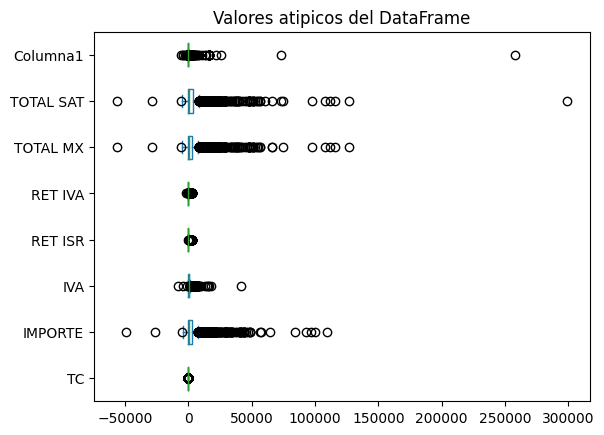

In [60]:
fig= plt.figure(figsize=(25,15))
df_numericos2020.plot(kind='box', vert=False)
plt.title('Valores atipicos del DataFrame')
plt.show()

In [74]:
y=df_numericos2020
percentile25= y.quantile(0.25)
percentile75= y.quantile(0.75)
iqr= percentile75-percentile25

limite_superior_iqr=percentile75 + 1.5*iqr
limite_inferior_iqr=percentile25 - 1.5*iqr

print('limite superior permitido:', limite_superior_iqr)

print('limite inferior permitido:', limite_inferior_iqr)



limite superior permitido: TC              1.00000
IMPORTE      7492.26375
IVA          1280.63375
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7983.17750
TOTAL SAT    8269.28375
Columna1        0.00000
dtype: float64
limite inferior permitido: TC              1.00000
IMPORTE     -4465.00625
IVA          -748.25625
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4783.14250
TOTAL SAT   -4832.96625
Columna1        0.00000
dtype: float64


In [75]:
outliers2020= df_numericos2020[(y>limite_superior_iqr)|(y<limite_inferior_iqr)]
outliers2020

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,NaN,NaN,2248.28,NaN,NaN,NaN,16300.00,14051.72
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10694.25,1711.08,NaN,NaN,12405.33,12405.33,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#obtener datps y outliers se convierten en nulos en el dataFrame  #aqui se hace la convecion de outliers en valores nulos

df3_iqr_2020=df_numericos2020[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]
df3_iqr_2020

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,NaN,0.0,0.0,2248.28,NaN,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [78]:
#reemplazar los valores nulso con la media
#realizar copia del dataFrame

data4iqr_2020=df3_iqr_2020.copy()
data4iqr_2020 =df3_iqr_2020.fillna(round(df3_iqr_2020.mean(),1))
data4iqr_2020


,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,222.20,0.0,0.0,2248.28,1333.00,0.0
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,1162.50,222.20,0.0,0.0,1239.10,1333.00,0.0
4,1.0,0.00,519.80,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [84]:
valores_nulos=data4iqr_2020.isnull().sum().sum()
print(valores_nulos)
print(data4iqr_2020)

0
       TC  IMPORTE     IVA  RET ISR  RET IVA  TOTAL MX  TOTAL SAT  Columna1
0     1.0     0.00  222.20      0.0      0.0   2248.28    1333.00       0.0
1     1.0   490.00   78.40      0.0      0.0    568.40     568.40       0.0
2     1.0   195.00   31.20      0.0      0.0    226.20     226.20       0.0
3     1.0  1162.50  222.20      0.0      0.0   1239.10    1333.00       0.0
4     1.0     0.00  519.80      0.0      0.0      0.00       0.00       0.0
...   ...      ...     ...      ...      ...       ...        ...       ...
3337  1.0   129.79   20.21      0.0      0.0    150.00     150.00       0.0
3338  1.0  2284.80  365.57      0.0      0.0   2650.37    2650.37       0.0
3339  1.0   163.79   26.21      0.0      0.0    190.00     190.00       0.0
3340  1.0     0.00    0.00      0.0      0.0      0.00       0.00       0.0
3341  1.0  1162.50    0.00      0.0      0.0   1239.10    1333.00       0.0

[3342 rows x 8 columns]


In [85]:
#unir el df4 sin outliers con el data frame de valores tipo string

In [ ]:
# descargar el nuevo data frame limpios

datos_limpios.to_csv('Datos limpios2020.csv')

In [ ]:
from google.colab import files
files.download('Datos limpios2020.csv')

#DataFrame para 2021


In [ ]:
#cargar archivo csv desde el equipo
from google.colab import files
files.upload()

In [ ]:
df_2021=pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name='2021', skiprows=3)
df_2021.head()

In [91]:
#supervisar que no hay nulos
nulos=df_2021.isnull().sum()
print(nulos)
#conocer el tipo de informacion que se contiene en el data Frame
print(df_2021.info())

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-nul

In [ ]:
# sustituir los valores faltantes ('FOLIO','MP','POLIZA' ) que son de tipo objeto
df_2021[['FOLIO','MP','POLIZA']]=df_2021[['FOLIO','MP','POLIZA']].fillna(method='ffill')
df_2021

<Figure size 2500x1500 with 0 Axes>

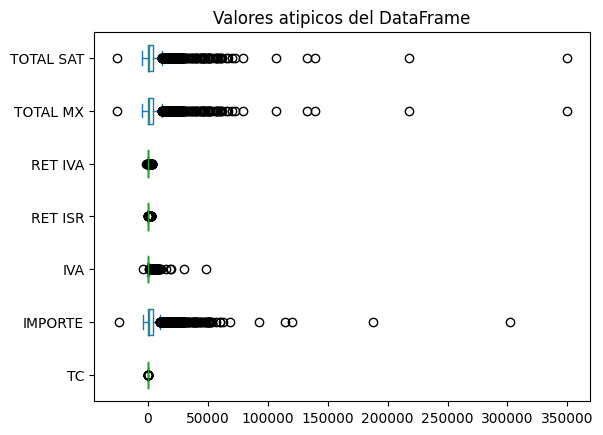

In [96]:
fig= plt.figure(figsize=(25,15))
df_2021.plot(kind='box', vert=False)
plt.title('Valores atipicos del DataFrame')
plt.show()

In [123]:
losdemasdatos=df_2021.iloc[:,[1,2,3,4,5,6,7,15,16,17]]
numericos2021= df_2021.iloc[:,[8,9,10,11,12,13,14]]

In [106]:
y=numericos
limite_superior=y.mean()+3*y.std()
limite_inferior=y.mean()-3*y.std()
print('Limite superior permitido: ', limite_superior)
print('Limite inferior permitido: ', limite_inferior)



Limite superior permitido:  TC               4.450857
IMPORTE      25280.893187
IVA           4735.794913
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
Columna1     14626.999268
dtype: float64
Limite inferior permitido:  TC              -2.326488
IMPORTE     -18982.198145
IVA          -3696.145310
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
Columna1    -14171.411134
dtype: float64


In [107]:
#encontrar los outliers

outliers= numericos[(y>limite_superior)|(y<limite_inferior)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df2_2021=numericos[(y<=limite_superior)&(y>=limite_inferior)]
df2_2021

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,NaN,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [120]:

dataclean_2021=df2_2021.copy()

dataclean_2021=dataclean_2021.fillna(round(df2_2021.mean(),1))
dataclean_2021

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,399.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [129]:
datos_limpios=pd.concat([losdemasdatos, dataclean_2021],axis=1)
datos_limpios.head()

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,0.00,399.00,0.0,0.0,0.00,0.00,0.00


In [ ]:
from google.colab import files
files.download('Datos limpios2020.csv')

#DataFrame para 2022

In [130]:
df_2022=pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name='2022', skiprows=3)
df_2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN


In [132]:
#supervisar que no hay nulos
nulos=df_2022.isnull().sum()
print(nulos)
#conocer el tipo de informacion que se contiene en el data Frame
print(df_2022.info())

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC   